<a href="https://colab.research.google.com/github/marian-ilagan/Gender-Classification-using-Neural-Network/blob/main/NN_Gender_Classification_Marian_Ilagan_301236806.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset can be used for various classification and data analysis tasks, such as predicting an individual's gender or income level based on their occupation, education level, and other demographic factors.
It consists of 10 columns as given:

ID: unique identifier for each individual in the dataset
Age: age in years

Height (cm): height in centimeters

Weight (kg): weight in kilograms

Occupation: profession or job title

Education Level: highest level of education attained

Marital Status: single, married, divorced, widowed, etc.

Income (USD): annual income in US dollars

Favorite Color: favorite color of the individual (this column is just for fun and has no real meaning)

Gender: male or female (Gender is the target label)


Downloaded from:

https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?resource=download

In [ ]:
import pandas as pd #data processing
import numpy as np #linear algebra
from sklearn.preprocessing import StandardScaler #data scaling
from sklearn.model_selection import train_test_split #data partition
from sklearn.neural_network import MLPClassifier

!pip install dmba
from dmba import classificationSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load and read data
gender = pd.read_csv('gender.csv')
gender.head()

,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Gender
0,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,male
1,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,male
2,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,female
3,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,male
4,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,female


##Data Preprocessing

**Data quality assessment** - summary



> The following needs to be done in data cleaning and transformation:

*   Remove extra spaces on column names
*   Remove duplicates on categorical values
*   Remove duplicated row (88, 127)
*   Create dummies for categorical variables
*   Standardize data to lessen the bias in the model














In [ ]:
gender.info()

#there are 131 observations, 9 features including the target variable.
#there are 4 numeric variables, 4 categorical variables and a categorical target
#there are no missing values
#need to rename columns to remove spaces

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0    Age              131 non-null    int64 
 1    Height (cm)      131 non-null    int64 
 2    Weight (kg)      131 non-null    int64 
 3    Occupation       131 non-null    object
 4    Education Level  131 non-null    object
 5    Marital Status   131 non-null    object
 6    Income (USD)     131 non-null    int64 
 7    Favorite Color   131 non-null    object
 8    Gender           131 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.3+ KB


In [ ]:
gender.describe()
#we need to scale the data to avoid bias on the model

,Age,Height (cm),Weight (kg),Income (USD)
count,131.000000,131.000000,131.000000,131.000000
mean,34.564885,173.198473,71.458015,93206.106870
std,5.984723,8.045467,12.648052,74045.382919
min,24.000000,160.000000,50.000000,30000.000000
25%,29.000000,166.000000,60.000000,55000.000000
50%,34.000000,175.000000,75.000000,75000.000000
75%,39.000000,180.500000,83.000000,100000.000000
max,52.000000,190.000000,94.000000,500000.000000


In [ ]:
for col in gender.columns:
  print(gender[col].unique())
#Some values have leading and trailing spaces that cause duplicates (e.g. ' Business Analyst' and Business Analyst')

[32 25 41 38 29 45 27 52 31 36 24 44 28 33 37 26 40 47 35 42 49 30 39 34
 43]
[175 182 160 178 165 190 163 179 168 177 162 183 166 181 170 176 169 187
 172 180 167 185 188 174 164 186 184]
[70 85 62 79 58 92 55 83 61 76 53 87 60 84 65 78 59 75 82 74 63 90 56 80
 68 57 81 50 54 86 77 88 94 64]
[' Software Engineer' ' Sales Representative' ' Doctor' ' Lawyer'
 ' Graphic Designer' ' Business Consultant' ' Marketing Specialist' ' CEO'
 ' Project Manager' ' Engineer' ' Accountant' ' Architect' ' Nurse'
 ' Analyst' ' Teacher' ' IT Manager' ' Writer' ' Business Analyst'
 'Engineer' 'Teacher' 'Doctor' 'Graphic Designer' 'IT Manager'
 'Sales Representative' 'Lawyer' 'Marketing Specialist' 'Project Manager'
 'Writer' 'Architect' 'Nurse' 'Business Analyst' 'Accountant' 'CEO'
 'Analyst' 'Software Developer']
[" Master's Degree" " Bachelor's Degree" ' Doctorate Degree'
 " Associate's Degree" "Master's Degree" "Bachelor's Degree"
 'Doctorate Degree' "Associate's Degree"]
[' Married' ' Single' ' Divo

In [ ]:
duplicate = gender[gender.duplicated(keep = False)]
 
print("Duplicate Rows :")
 
#printing results
duplicate

Duplicate Rows :


,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Gender
88,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black,male
127,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black,male


**Data cleaning**

In [ ]:
#Removing extra spaces on columns
gender.columns = [s.strip().replace(' ', '_') for s in gender.columns]
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              131 non-null    int64 
 1   Height_(cm)      131 non-null    int64 
 2   Weight_(kg)      131 non-null    int64 
 3   Occupation       131 non-null    object
 4   Education_Level  131 non-null    object
 5   Marital_Status   131 non-null    object
 6   Income_(USD)     131 non-null    int64 
 7   Favorite_Color   131 non-null    object
 8   Gender           131 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.3+ KB


In [ ]:
#Remove extra leading and tailing spaces from the data.
def remove_spaces(gender):
    for i in gender.columns: # iterating over the columns
        if gender[i].dtype == 'object':  # checking datatype of each columns
            gender[i] = gender[i].map(str.strip) # applying strip function on column
        else:
            pass
 
# applying whitespace_remover function on dataframe
remove_spaces(gender)
 
# printing dataframe to verify if extra spaces are removed
for col in gender.columns:
  print(gender[col].unique())

[32 25 41 38 29 45 27 52 31 36 24 44 28 33 37 26 40 47 35 42 49 30 39 34
 43]
[175 182 160 178 165 190 163 179 168 177 162 183 166 181 170 176 169 187
 172 180 167 185 188 174 164 186 184]
[70 85 62 79 58 92 55 83 61 76 53 87 60 84 65 78 59 75 82 74 63 90 56 80
 68 57 81 50 54 86 77 88 94 64]
['Software Engineer' 'Sales Representative' 'Doctor' 'Lawyer'
 'Graphic Designer' 'Business Consultant' 'Marketing Specialist' 'CEO'
 'Project Manager' 'Engineer' 'Accountant' 'Architect' 'Nurse' 'Analyst'
 'Teacher' 'IT Manager' 'Writer' 'Business Analyst' 'Software Developer']
["Master's Degree" "Bachelor's Degree" 'Doctorate Degree'
 "Associate's Degree"]
['Married' 'Single' 'Divorced' 'Widowed']
[ 75000  45000 120000  90000  35000 110000  50000 500000  80000  95000
  40000  55000  60000  65000  85000  30000 150000  70000 100000 130000
 180000 250000]
['Blue' 'Green' 'Purple' 'Red' 'Yellow' 'Black' 'Pink' 'Orange' 'Grey']
['male' 'female']


In [ ]:
#rechecking if there are other duplicates. After removing the spaces, there are no other duplicates aside from the two rows.
duplicate = gender[gender.duplicated(keep = False)]
 
print("Duplicate Rows :")
 
#printing results
duplicate

Duplicate Rows :


,Age,Height_(cm),Weight_(kg),Occupation,Education_Level,Marital_Status,Income_(USD),Favorite_Color,Gender
88,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black,male
127,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black,male


In [ ]:
#Removing duplicate row 127
gender = gender.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

#validation if duplicate is removed. Correct - only 1 entry is removed
gender.shape

(130, 9)

In [ ]:
#creating dummies for categorical variables
gender = pd.get_dummies(gender, prefix = ['Occ','Edu','MS','Fav','Gender'], 
                        columns=['Occupation','Education_Level', 'Marital_Status', 'Favorite_Color','Gender'], drop_first=True)
gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 130
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       130 non-null    int64
 1   Height_(cm)               130 non-null    int64
 2   Weight_(kg)               130 non-null    int64
 3   Income_(USD)              130 non-null    int64
 4   Occ_Analyst               130 non-null    uint8
 5   Occ_Architect             130 non-null    uint8
 6   Occ_Business Analyst      130 non-null    uint8
 7   Occ_Business Consultant   130 non-null    uint8
 8   Occ_CEO                   130 non-null    uint8
 9   Occ_Doctor                130 non-null    uint8
 10  Occ_Engineer              130 non-null    uint8
 11  Occ_Graphic Designer      130 non-null    uint8
 12  Occ_IT Manager            130 non-null    uint8
 13  Occ_Lawyer                130 non-null    uint8
 14  Occ_Marketing Specialist  130 non-null    

**Data transformation / Data reduction (Feature selection)**

<Axes: >

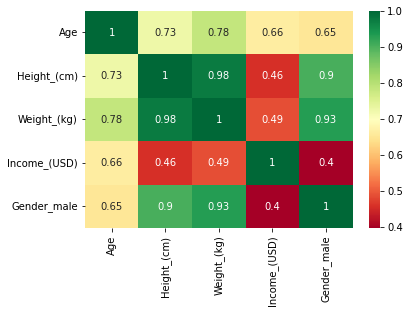

In [ ]:
#checking correlation of numerical values.
  #Weight and Height are 98% correlated.
  #We will exclude Height in the modeling since Weight is more correlated to Gender
import seaborn as sns
import matplotlib.pyplot as plt
col = ['Age', 'Height_(cm)', 'Weight_(kg)','Income_(USD)','Gender_male']
corr = gender[col].corr()
fig, ax = plt.subplots()
sns.heatmap(corr, cmap='RdYlGn', annot=True)

##Model Training and Evaluation

In [ ]:
#define X and y dataframes
excluded = ['Height_(cm)', 'Gender_male']
outcome = 'Gender_male'
predictors = [c for c in gender.columns if c!=outcome]

X = gender[predictors]
y = gender[outcome]

print(X.shape)
print(y.shape)

(130, 36)
(130,)


In [ ]:
#scaling data
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
round(X.describe(),2)

,Age,Height_(cm),Weight_(kg),Income_(USD),Occ_Analyst,Occ_Architect,Occ_Business Analyst,Occ_Business Consultant,Occ_CEO,Occ_Doctor,...,MS_Single,MS_Widowed,Fav_Blue,Fav_Green,Fav_Grey,Fav_Orange,Fav_Pink,Fav_Purple,Fav_Red,Fav_Yellow
count,130.00,130.00,130.00,130.00,130.00,130.00,130.0,130.00,130.00,130.00,...,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.0,0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.76,-1.64,-1.69,-0.85,-0.22,-0.24,-0.2,-0.09,-0.22,-0.27,...,-0.91,-0.12,-0.44,-0.44,-0.26,-0.32,-0.24,-0.39,-0.39,-0.37
25%,-0.93,-0.89,-0.90,-0.52,-0.22,-0.24,-0.2,-0.09,-0.22,-0.27,...,-0.91,-0.12,-0.44,-0.44,-0.26,-0.32,-0.24,-0.39,-0.39,-0.37
50%,-0.17,0.23,0.25,-0.25,-0.22,-0.24,-0.2,-0.09,-0.22,-0.27,...,-0.91,-0.12,-0.44,-0.44,-0.26,-0.32,-0.24,-0.39,-0.39,-0.37
75%,0.75,0.94,0.92,0.09,-0.22,-0.24,-0.2,-0.09,-0.22,-0.27,...,1.10,-0.12,-0.44,-0.44,-0.26,-0.32,-0.24,-0.39,-0.39,-0.37
max,2.92,2.09,1.79,5.49,4.55,4.19,5.0,11.36,4.55,3.67,...,1.10,8.00,2.28,2.28,3.91,3.14,4.19,2.58,2.58,2.67


In [ ]:
#data partition
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state = 1)
print(X_train.shape)
print(X_valid.shape)

(97, 36)
(33, 36)


In [ ]:
#data modeling
clf = MLPClassifier(hidden_layer_sizes=2, activation='logistic', solver = 'lbfgs', random_state = 1)
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

In [ ]:
#predictions on train and test data
y_pred_train = clf.predict(X_train)
y_pred_valid = clf.predict(X_valid)
y_pred_valid

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=uint8)

**Model Performance and Evaluation**

In [ ]:
#accuracy of train data
classificationSummary(y_train, y_pred_train)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual  0  1
     0 48  0
     1  0 49


In [ ]:
#accuracy of test data
classificationSummary(y_valid, y_pred_valid)

Confusion Matrix (Accuracy 0.9697)

       Prediction
Actual  0  1
     0 14  1
     1  0 18


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_valid, y_pred_valid))
print("Precision:", precision_score(y_valid, y_pred_valid, average="binary"))
print("Recall:", recall_score(y_valid, y_pred_valid, average="binary"))
print("F1 Score:", f1_score(y_valid, y_pred_valid, average="binary"))

Accuracy: 0.9696969696969697
Precision: 0.9473684210526315
Recall: 1.0
F1 Score: 0.972972972972973


##Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
param_grid = {'hidden_layer_sizes': [1,2,3,4,5,6,7,8],
              'solver': ['lbfgs','adam']}

In [ ]:
clf2 = GridSearchCV(MLPClassifier(activation='logistic', 
                    random_state=1, max_iter=500),
                   param_grid=param_grid,
                   cv=5, n_jobs=-1)
clf2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic', max_iter=500,
                                     random_state=1),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [1, 2, 3, 4, 5, 6, 7, 8],
                         'solver': ['lbfgs', 'adam']})

In [ ]:
clf2.best_estimator_

MLPClassifier(activation='logistic', hidden_layer_sizes=6, max_iter=500,
              random_state=1, solver='lbfgs')

In [ ]:
print("Accuracy:", accuracy_score(y_valid, clf2.predict(X_valid)))
print("Precision:", precision_score(y_valid, clf2.predict(X_valid), average="binary"))
print("Recall:", recall_score(y_valid, clf2.predict(X_valid), average="binary"))
print("F1 Score:", f1_score(y_valid, clf2.predict(X_valid), average="binary"))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
classificationSummary(y_valid, clf2.predict(X_valid))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual  0  1
     0 15  0
     1  0 18
